In [ ]:
!pip install opencv-python # OpenCV 라이브러리 설치

import cv2 # OpenCV 라이브러리 import
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(269, 256)


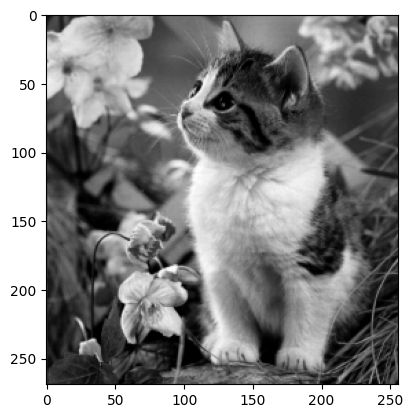

In [15]:

img = cv2.imread('/content/gdrive/My Drive/Colabip/Images/cat.bmp') # 이미지 파일 읽기
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg1= cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1,cmap='gray')

In [16]:
gOutimg=np.zeros((gimg1.shape[0], gimg1.shape[1]))

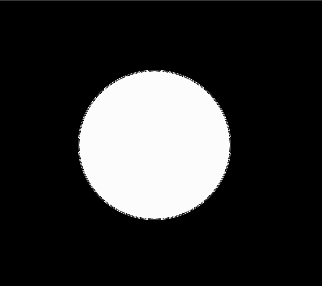

In [68]:
for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    val=gimg1[h, w]%64
    val=val*4
    gOutimg[h,w]=val

cv2_imshow(gOutimg)

In [ ]:
equalVal = 128
width = 5


min = equalVal - width
max= equalVal + width

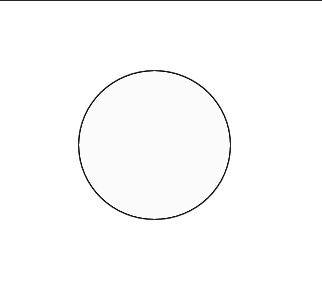

In [63]:
gOutimg=np.zeros((gimg1.shape[0], gimg1.shape[1])) # gOutimg의 크기를 gimg1의 크기와 같게 변경합니다.

for h in range(0, gimg1.shape[0]):
  for w in range(0, gimg1.shape[1]):
    val = 255*(gimg1[h,w]/128 -1)*(gimg1[h,w]/128 -1)
    gOutimg[h,w]=val

cv2_imshow(gOutimg)

In [64]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2

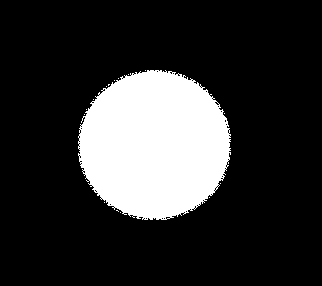

In [65]:
gWaterMarker = gimg1.copy()

for h in range(0, gWaterMarker.shape[0]):
  for w in range(0, gWaterMarker.shape[1]):
    imVal=(int)(gWaterMarker[h,w]/planeValue)
    if(imVal % 2 == 0):
     gOutimg[h,w]=0
    else:
     gOutimg[h,w]=255

cv2_imshow(gOutimg)

(286, 322)


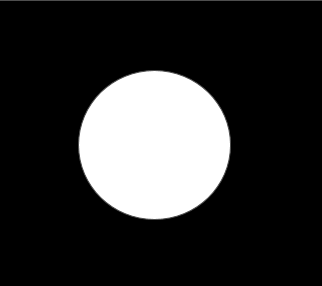

In [66]:

img = cv2.imread('/content/gdrive/My Drive/Colabip/Images/circle.bmp') # 이미지 파일 읽기
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg2= cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
cv2_imshow(gimg2)

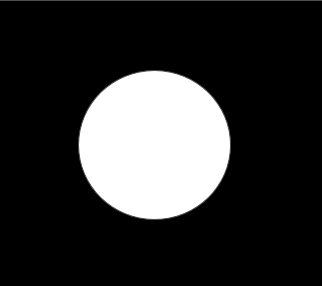

In [67]:
gWaterMarker = gimg1.copy()

for h in range(0, gimg2.shape[0]):
  for w in range(0, gimg2.shape[1]):
    imVal = gimg2[h,w]
    if(imVal > 128):
      if(gimg1[h,w] % 2 == 0):
        gWaterMarker[h,w] += 1
    else:
      if(gimg1[h,w] % 2 == 1):
        gWaterMarker[h,w] -= 1

cv2_imshow(gWaterMarker)